In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
#Load each country’s cleaned CSV (../data/benin_clean.csv, togo_clean.csv, sierraleone_clean) locally.
benin = pd.read_csv('../data/benin_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')
sierraleone = pd.read_csv('../data/sierraleone_clean.csv')
# Combine the three dataframes into one
# combined_df = pd.concat([benin, togo, sierraleone], ignore_index=True)
# Check for missing values


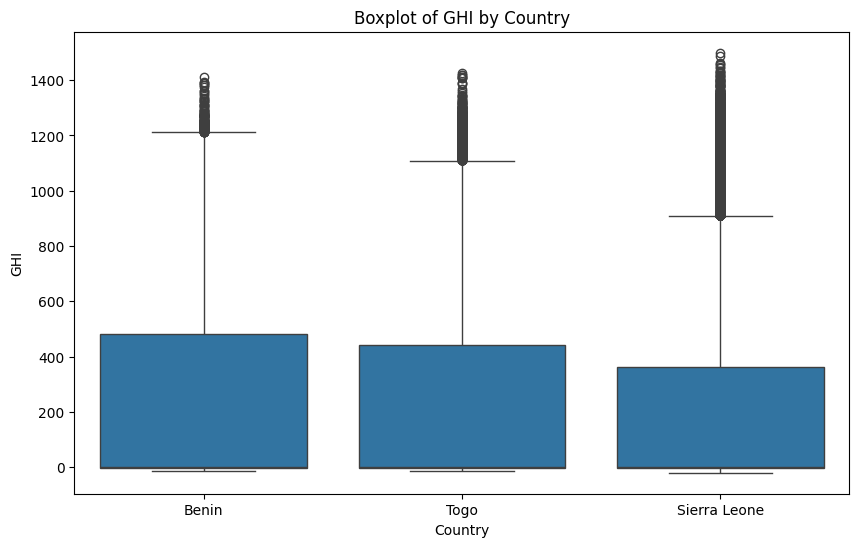

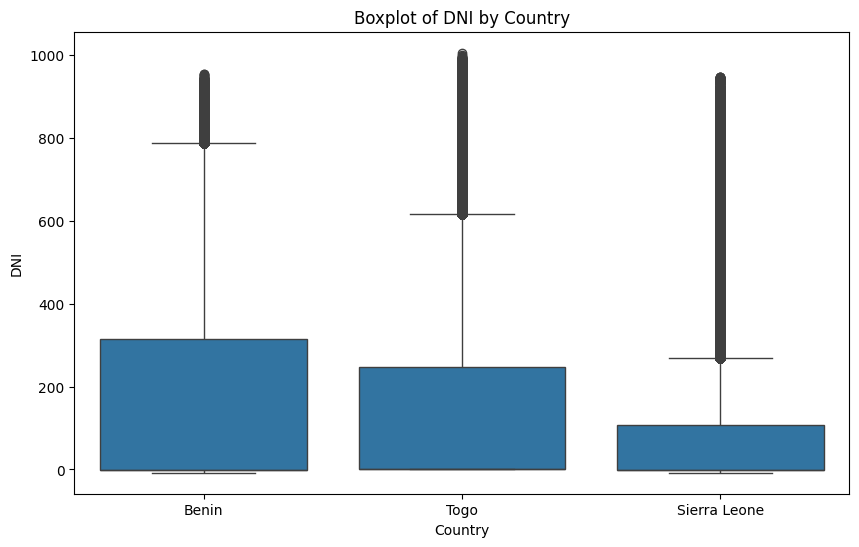

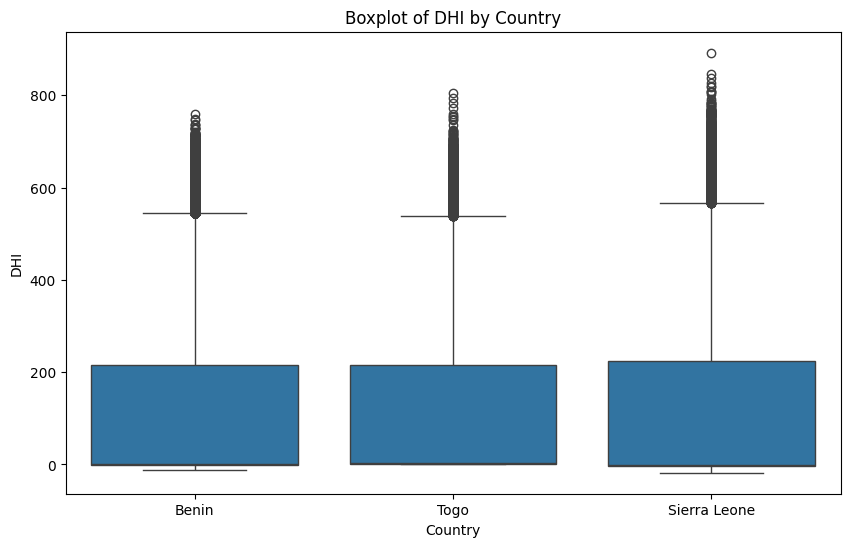

In [3]:
# Add 'country' column to each dataframe
benin['country'] = 'Benin'
togo['country'] = 'Togo'
sierraleone['country'] = 'Sierra Leone'

# Combine all dataframes
combined_df = pd.concat([benin, togo, sierraleone], ignore_index=True)

# Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country)
def plot_boxplots(df, metric):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='country', y=metric, data=df)
    plt.title(f'Boxplot of {metric} by Country')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.show()

plot_boxplots(combined_df, 'GHI')
plot_boxplots(combined_df, 'DNI')
plot_boxplots(combined_df, 'DHI')


In [4]:
#Summary Table comparing mean, median, and standard deviation of GHI, DNI, DHI across countries.
def summary_statistics(df, metric):
    summary = df.groupby('country')[metric].agg(['mean', 'median', 'std']).reset_index()
    summary.columns = ['Country', 'Mean', 'Median', 'Standard Deviation']
    return summary
summary_ghi = summary_statistics(combined_df, 'GHI')
summary_dni = summary_statistics(combined_df, 'DNI')
summary_dhi = summary_statistics(combined_df, 'DHI')

# Print summary statistics
print("Summary Statistics for GHI:")
print(summary_ghi)
print("\nSummary Statistics for DNI:")
print(summary_dni)
print("\nSummary Statistics for DHI:")
print(summary_dhi)


Summary Statistics for GHI:
        Country        Mean  Median  Standard Deviation
0         Benin  240.559452     1.8          331.131327
1  Sierra Leone  201.957515     0.3          298.495150
2          Togo  230.555040     2.1          322.532347

Summary Statistics for DNI:
        Country        Mean  Median  Standard Deviation
0         Benin  167.187516    -0.1          261.710501
1  Sierra Leone  116.376337    -0.1          218.652659
2          Togo  151.258469     0.0          250.956962

Summary Statistics for DHI:
        Country        Mean  Median  Standard Deviation
0         Benin  115.358961     1.6          158.691074
1  Sierra Leone  113.720571    -0.1          158.946032
2          Togo  116.444352     2.5          156.520714


In [5]:
#Run a one-way ANOVA (or Kruskal–Wallis) on GHI values to assess whether differences between countries are significant.
def anova_test(df, metric):
    groups = [group[metric].values for name, group in df.groupby('country')]
    f_stat, p_value = stats.f_oneway(*groups)
    return f_stat, p_value
f_stat_ghi, p_value_ghi = anova_test(combined_df, 'GHI')
f_stat_dni, p_value_dni = anova_test(combined_df, 'DNI')
f_stat_dhi, p_value_dhi = anova_test(combined_df, 'DHI')

# Print ANOVA results
print("ANOVA Results for GHI:")
print("F-statistic:", f_stat_ghi)
print("p-value:", p_value_ghi)
print("\nANOVA Results for DNI:")
print("F-statistic:", f_stat_dni)
print("p-value:", p_value_dni)
print("\nANOVA Results for DHI:")
print("F-statistic:", f_stat_dhi)
print("p-value:", p_value_dhi)



ANOVA Results for GHI:
F-statistic: 2090.092870479632
p-value: 0.0

ANOVA Results for DNI:
F-statistic: 5940.054317311629
p-value: 0.0

ANOVA Results for DHI:
F-statistic: 39.55875323513278
p-value: 6.6112375267197736e-18


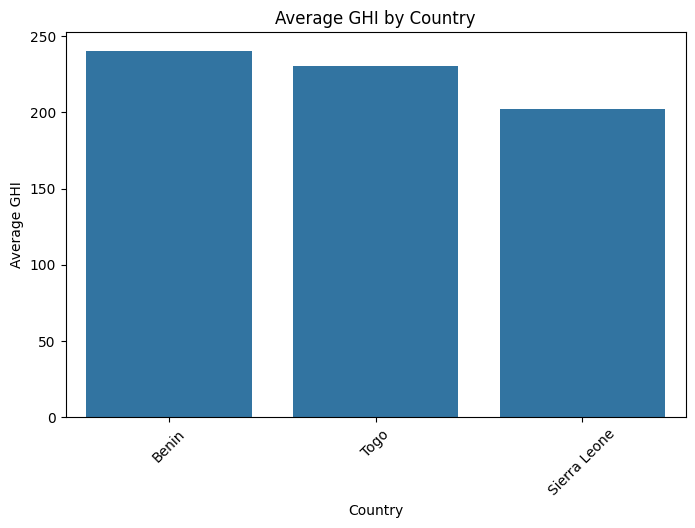

In [7]:
#A small bar chart ranking countries by average GHI.
def plot_average_ghi(df):
    avg_ghi = df.groupby('country')['GHI'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_ghi.index, y=avg_ghi.values)
    plt.title('Average GHI by Country')
    plt.xlabel('Country')
    plt.ylabel('Average GHI')
    plt.xticks(rotation=45)
    plt.show()
plot_average_ghi(combined_df)

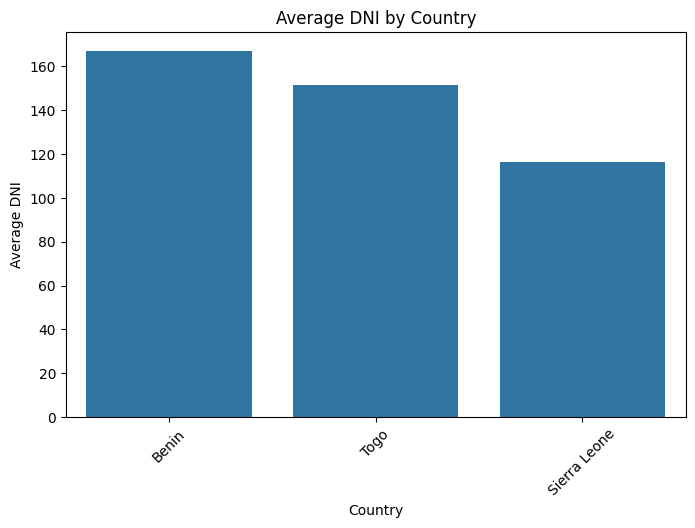

In [8]:
#A small bar chart ranking countries by average DNI.
def plot_average_dni(df):
    avg_dni = df.groupby('country')['DNI'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_dni.index, y=avg_dni.values)
    plt.title('Average DNI by Country')
    plt.xlabel('Country')
    plt.ylabel('Average DNI')
    plt.xticks(rotation=45)
    plt.show()
plot_average_dni(combined_df)